<a href="https://colab.research.google.com/github/Vaelastraszz/Fashion_recommender/blob/master/Recommandation_Romz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
pd.options.display.max_columns = None

In [0]:
order = pd.read_excel('/content/gdrive/My Drive/Interview/Reco/Orders.xlsx')
products = pd.read_excel('/content/gdrive/My Drive/Interview/Reco/Products.xlsx')
users = pd.read_excel('/content/gdrive/My Drive/Interview/Reco/Users.xlsx')
clickstream = pd.read_csv('/content/gdrive/My Drive/Interview/Reco/Clickstream.csv')
click_user = pd.read_csv('/content/gdrive/My Drive/Interview/Reco/ClickstreamUserActions.csv')

<h2> Overview of the different data sources </h2>

<h3> Orders </h3>

In [0]:
order.head()

,orderportalid,OrderCode,OrderDate,ProductId,ProductGender,UserID,CustomerCurrency,Country,Quantity,Revenue_GBP
0,1677298,FAZR,20150109,10872723,WOMEN,0x20A9048DB67131045B50CA50396C57D8,EUR,Spain,1,3.94
1,1691991,Z6AL,20150122,10810380,WOMEN,0xC342A73AD982F596D81A82FF259F2B23,USD,United States,1,4.47
2,1768756,TCQH,20150105,10719956,MEN,0xBAD31200867432B0BD880B3BB21B09DA,GBP,United Kingdom,1,1.55
3,1768756,TCQH,20150105,10722834,MEN,0xBAD31200867432B0BD880B3BB21B09DA,GBP,United Kingdom,1,1.55
4,1783005,WH9S,20150106,10717215,WOMEN,0x2640A82A65D3446DBCE5F9EB29C1D36D,USD,United States,1,8.60


<h3> Products </h3>

In [0]:
products.head()

,ProductID,ProductName,Family,Category,SeasonOriginal,Brand,MainColour,ItemURL,PictureURL,Department,Gender
0,10924361,ÁGUA DE COCO 7909082768538 COLORIDO ??? Polyester,Clothing,Dresses,SS14,ÁGUA DE COCO,BLUE,http://www.farfetch.com/shopping/item10924361....,http://cdn-images.farfetch.com/10/92/43/61/109...,Lab,WOMEN
1,10924362,ÁGUA DE COCO 7909082770470 COLORIDO ??? Viscose,Clothing,Dresses,SS14,ÁGUA DE COCO,RED,http://www.farfetch.com/shopping/item10924362....,http://cdn-images.farfetch.com/10/92/43/62/109...,Lab,WOMEN
2,10924376,MARIES ROBE DE NUIT 1421010070101 OFF WHITE ??...,Clothing,Lingerie & Hosiery,SS14,MARIES ROBE DE NUIT,WHITE,http://www.farfetch.com/shopping/item10924376....,http://cdn-images.farfetch.com/10/92/43/76/109...,Lab,WOMEN
3,10924379,MARIES ROBE DE NUIT 1410300050305 VERDE ??? Vi...,Clothing,Lingerie & Hosiery,SS14,MARIES ROBE DE NUIT,GREEN,http://www.farfetch.com/shopping/item10924379....,http://cdn-images.farfetch.com/10/92/43/79/109...,Lab,WOMEN
4,10924411,pebbled clutch,Bags,Clutches,SS15,LANVIN,BLACK,http://www.farfetch.com/shopping/item10924411....,http://cdn-images.farfetch.com/10/92/44/11/109...,Luxe,WOMEN


<h3> Users </h3>

In [0]:
users.head()

,UserID,Gender,UserType,IsSubscribed,Birthday,HasUsedWishlist,HasItemsOnBag,IsUsingMultipleDevices,IsPersonalShopper,IsVIP
0,0x0D3056570A0D90872B31C6F414DF021D,Women,Customer,Yes,NaT,Yes,Yes,Yes,No,Not VIP
1,0x96D2E60551F80B7AE46EE722C30221B0,N/D,Customer,No,NaT,No,No,Yes,No,Not VIP
2,0x69093F1011A2BD322D8A87009A8494AC,N/D,Customer,No,NaT,No,No,No,No,Not VIP
3,0xA841752499FF55CFF73856B1847EE978,Women,Customer,No,NaT,Yes,No,Yes,No,Not VIP
4,0x2D3A37B5AFF04368D1ABD1F3E8465426,Women,Customer,No,NaT,No,Yes,No,No,Not VIP


<h3> Clickstream </h3>

In [0]:
clickstream.head()

,PageViewDate,sessionid,SessionIdFinal,CookieID,PageType,PageSubType,PageURL,Referral,ProductID,UserID,UserIDIdentified,GeoSubfolder,orderportalid
0,2015-01-14 09:25:31.947,wk3qgqkpfy1qel0tbcats5jm,wk3qgqkpfy1qel0tbcats5jm-D20150114-N7277,iwo0v34xejz3tooxqleberel578CEF4562824948040D78...,Product Page,Product Page,http://www.farfetch.com/shopping/women/lanvin-...,http://www.farfetch.com/shopping/women/sale/cl...,10746328,NaN,0xEB088890C11305AEE5A0A37C52B9BA72,United States,NaN
1,2015-01-17 03:52:08.497,w50e1wkg0wuimfenyhun0qgw,w50e1wkg0wuimfenyhun0qgw-D20150117-N27106,wnjklehkxfe4mlhb3bktal52B6E6A8F0D4C02EDD9193E8...,Product Page,Product Page,http://www.farfetch.com/shopping/women/31-phil...,http://www.farfetch.com/shopping/women/search/...,10727895,NaN,0x4B6768C3E224027796A5D371B5C1F768,United States,NaN
2,2015-01-16 19:24:42.147,jaotvjamk25jd0mhipkfgt2p,jaotvjamk25jd0mhipkfgt2p-D20150116-N27816,bl0o3jldripyitenac3uf4lp2C9533ED0C61696B551139...,Product Page,Product Page,http://www.farfetch.com/shopping/men/dsquared2...,http://www.farfetch.com/shopping/men/dsquared2...,10734558,NaN,0x8A31556FC4BB8DE629E7DCD6000D63F4,United States,NaN
3,2015-01-17 15:16:34.557,uleu1b4nic0h14v3fx15wtds,uleu1b4nic0h14v3fx15wtds-D20150117-N0,4nkmvpm0hj4qpcvyri3qpp4h4BAE840D3015765F101133...,Product Page,Product Page,http://www.farfetch.com/cn/shopping/women/carv...,http://www.farfetch.com/cn/shopping/women/carv...,10726287,NaN,0xAFA719A51E018FDB7090FDD0406FC73B,China,NaN
4,2015-01-15 06:24:30.577,e3qf51abgaouhcx4gay5ay0n,e3qf51abgaouhcx4gay5ay0n-D20150115-N29158,x0s3niroydgptgi1l31orb14581D429ED1D25A0A77DC48...,Product Page,Product Page,http://www.farfetch.com/shopping/women/rosie-a...,http://www.farfetch.com/shopping/capitol/women...,10753382,NaN,0x4DD09FE7CCDCD246B194CE0731BA2A8E,United States,NaN


<h3> Clickstream User </h3>

In [0]:
click_user.head()

,ActionDate,sessionid,SessionIdFinal,CookieID,PageType,PageSubType,URL,ProductID,trackerId,UserAction,UserID,UserIDIdentified,GeoSubfolder
0,2015-01-15 20:29:42.133,s1tu4hpluogoexaw02zvcx3g,s1tu4hpluogoexaw02zvcx3g-D20150115-N0,r3tga5s5ytitxat0m1sdwpqhFEFC4A4E78F7E4DEEB4EA8...,Listing Page,Sale,http://www.farfetch.com/shopping/women/sale/cl...,-2,35,Save,0xCFCD208495D565EF66E7DFF9F98764DA,0xCFCD208495D565EF66E7DFF9F98764DA,Spain
1,2015-01-15 20:29:38.477,s1tu4hpluogoexaw02zvcx3g,s1tu4hpluogoexaw02zvcx3g-D20150115-N0,r3tga5s5ytitxat0m1sdwpqhFEFC4A4E78F7E4DEEB4EA8...,Listing Page,Sale,http://www.farfetch.com/shopping/women/sale/cl...,-2,35,Save,0xCFCD208495D565EF66E7DFF9F98764DA,0xCFCD208495D565EF66E7DFF9F98764DA,Spain
2,2015-01-15 20:30:56.460,s1tu4hpluogoexaw02zvcx3g,s1tu4hpluogoexaw02zvcx3g-D20150115-N0,r3tga5s5ytitxat0m1sdwpqhFEFC4A4E78F7E4DEEB4EA8...,Listing Page,Sale,http://www.farfetch.com/shopping/women/sale/cl...,-2,35,Save,0xCFCD208495D565EF66E7DFF9F98764DA,0xCFCD208495D565EF66E7DFF9F98764DA,Spain
3,2015-01-15 20:30:35.710,s1tu4hpluogoexaw02zvcx3g,s1tu4hpluogoexaw02zvcx3g-D20150115-N0,r3tga5s5ytitxat0m1sdwpqhFEFC4A4E78F7E4DEEB4EA8...,Listing Page,Sale,http://www.farfetch.com/shopping/women/sale/cl...,-2,35,Save,0xCFCD208495D565EF66E7DFF9F98764DA,0xCFCD208495D565EF66E7DFF9F98764DA,Spain
4,2015-01-15 20:30:41.710,s1tu4hpluogoexaw02zvcx3g,s1tu4hpluogoexaw02zvcx3g-D20150115-N0,r3tga5s5ytitxat0m1sdwpqhFEFC4A4E78F7E4DEEB4EA8...,Listing Page,Sale,http://www.farfetch.com/shopping/women/sale/cl...,-2,35,Save,0xCFCD208495D565EF66E7DFF9F98764DA,0xCFCD208495D565EF66E7DFF9F98764DA,Spain


In [0]:
click_user.UserAction.unique()

array(['Save', 'Click on Next to other page', 'Click on "60"/"180"',
       'Use Multi-Select filter', 'Use Price filter', 'Sort by other',
       'N/D', 'Click on back to top arrow', 'Click on forward arrow',
       'Click on navigation of thumbnails',
       'Click to see Bag details on Header', 'Remove from bag',
       'Click on NickName to see dropdown list of options',
       'Click on picture',
       'Notify me if back in stock, click on Send button',
       'Is your size not available?', 'Expand/Collapse Description',
       'Click on drop down to select size', 'Pause video', 'Add to Bag',
       'Clear button', 'Expand/Collapse Size and Fit',
       'Expand/Collapse Boutique', 'Size guide', 'Click on back arrow',
       'Click on Full Screen', 'Expand/Collapse Composition Care',
       'Click on "Remove Item"', 'Play video', 'Unsave',
       'Click to see Favorite details on Header', 'Click on "Register"',
       'End video', 'Filter by Category', 'Click on Letter/Number',
  

<h2> EDA on each dataframe </h2>

<h3> Order </h3>

In [0]:
order.isnull().sum().sort_values(ascending=False) / order.shape[0] * 100

Revenue_GBP         0.0
Quantity            0.0
Country             0.0
CustomerCurrency    0.0
UserID              0.0
ProductGender       0.0
ProductId           0.0
OrderDate           0.0
OrderCode           0.0
orderportalid       0.0
dtype: float64

In [0]:
gender=order[['ProductId','ProductGender']].drop_duplicates()
gender.groupby(['ProductGender'])['ProductId'].aggregate({'ProductId': lambda x : x.count()/gender.shape[0]*100}).reset_index().sort_values('ProductId', ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,ProductGender,ProductId
2,WOMEN,61.327597
0,MEN,36.250768
1,UNISEX,2.421635


In [0]:
country=order[['UserID','Country']].drop_duplicates()
country.groupby(['Country'])['UserID'].aggregate({'UserID': lambda x : x.count()/country.shape[0]*100}).reset_index().sort_values('UserID', ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,Country,UserID
92,United States,32.635073
91,United Kingdom,10.828755
13,Brazil,6.879579
5,Australia,5.723443
35,Hong Kong,4.922161
30,France,4.063645
32,Germany,3.353938
45,"Korea, Republic of",2.735806
77,Singapore,1.774267
75,Russian Federation,1.762821


In [0]:
order.Revenue_GBP.describe()

count    10000.000000
mean         3.180853
std          3.087422
min          0.040000
25%          1.270000
50%          2.310000
75%          4.000000
max         60.270000
Name: Revenue_GBP, dtype: float64

In [0]:
sum_prod = order['Quantity'].groupby(order['ProductId']).sum().reset_index()
sum_prod.sort_values(by = ['Quantity'], ascending=[False])

,ProductId,Quantity
6124,10872007,28
6944,10891162,19
15,10120391,19
7370,10898597,19
16,10120392,16
7111,10894177,14
7345,10898516,13
2603,10764174,12
7968,10915186,12
7267,10897385,11


<h3> Products </h3>

In [0]:
products.isnull().sum().sort_values(ascending=False) / products.shape[0] * 100

Unnamed: 11       99.998318
Brand              0.052705
Department         0.024110
Gender             0.013457
SeasonOriginal     0.006168
PictureURL         0.004486
ItemURL            0.004486
MainColour         0.004486
Category           0.003925
Family             0.003925
ProductName        0.000561
ProductID          0.000000
dtype: float64

In [0]:
products[products.ProductID.astype(str).str.isnumeric()==False]

,ProductID,ProductName,Family,Category,SeasonOriginal,Brand,MainColour,ItemURL,PictureURL,Department,Gender,Unnamed: 11
52509,74/38/82/10743882_3639004_200.jpg,Luxe,MEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86184,http://cdn-images.farfetch.com/10/78/48/07/107...,Luxe,MEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100992,g,Luxe,WOMEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172142,5337.aspx,http://cdn-images.farfetch.com/10/86/53/37/108...,Luxe,WOMEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
products = products[products.ProductID.astype(str).str.isnumeric()==True]

In [0]:
products = products.drop(labels='Unnamed: 11', axis=1)

In [0]:
products=products.dropna()

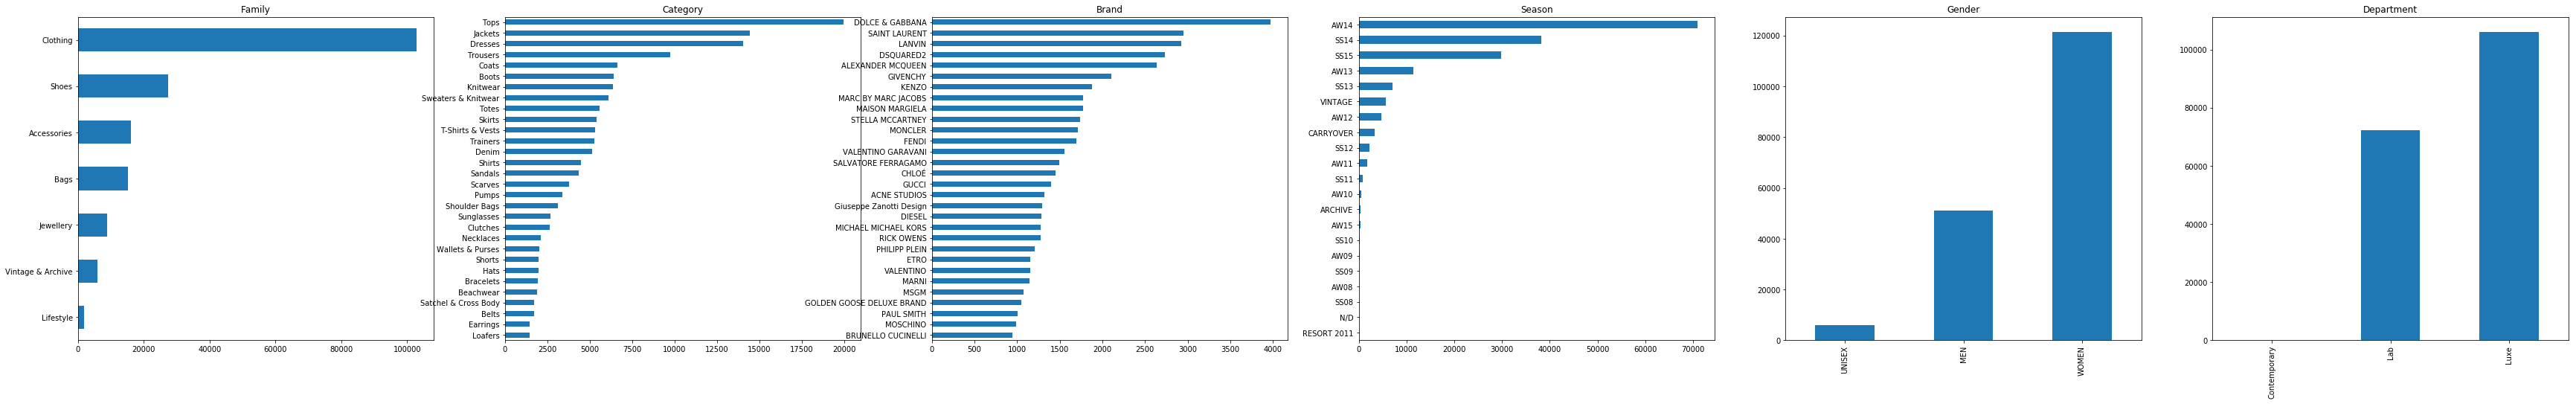

In [0]:
fig, ax = plt.subplots(nrows=1, ncols=6, sharey=False, figsize=(60,8))

ax[0].set_title("Family")
ax[1].set_title("Category")
ax[2].set_title("Brand")
ax[3].set_title("Season")
ax[4].set_title("Gender")
ax[5].set_title("Department")

count = products.Family.value_counts()
count.sort_values().plot(kind='barh',  legend=False, ax=ax[0])

count = products.Category.value_counts()
count.nlargest(30).sort_values().plot(kind='barh',  legend=False, ax=ax[1])

count = products.Brand.value_counts()
count.nlargest(30).sort_values().plot(kind='barh',  legend=False, ax=ax[2])

count = products.SeasonOriginal.value_counts()
count.sort_values().plot(kind='barh',  legend=False, ax=ax[3])

count = products.Gender.value_counts()
count.sort_values().plot(kind='bar',  legend=False, ax=ax[4])

count = products.Department.value_counts()
count.sort_values().plot(kind='bar',  legend=False, ax=ax[5])

<h3> User </h3>

In [0]:
users.isnull().sum().sort_values(ascending=False) / users.shape[0] * 100

Birthday                  89.794377
IsVIP                      0.000000
IsPersonalShopper          0.000000
IsUsingMultipleDevices     0.000000
HasItemsOnBag              0.000000
HasUsedWishlist            0.000000
IsSubscribed               0.000000
UserType                   0.000000
Gender                     0.000000
UserID                     0.000000
dtype: float64

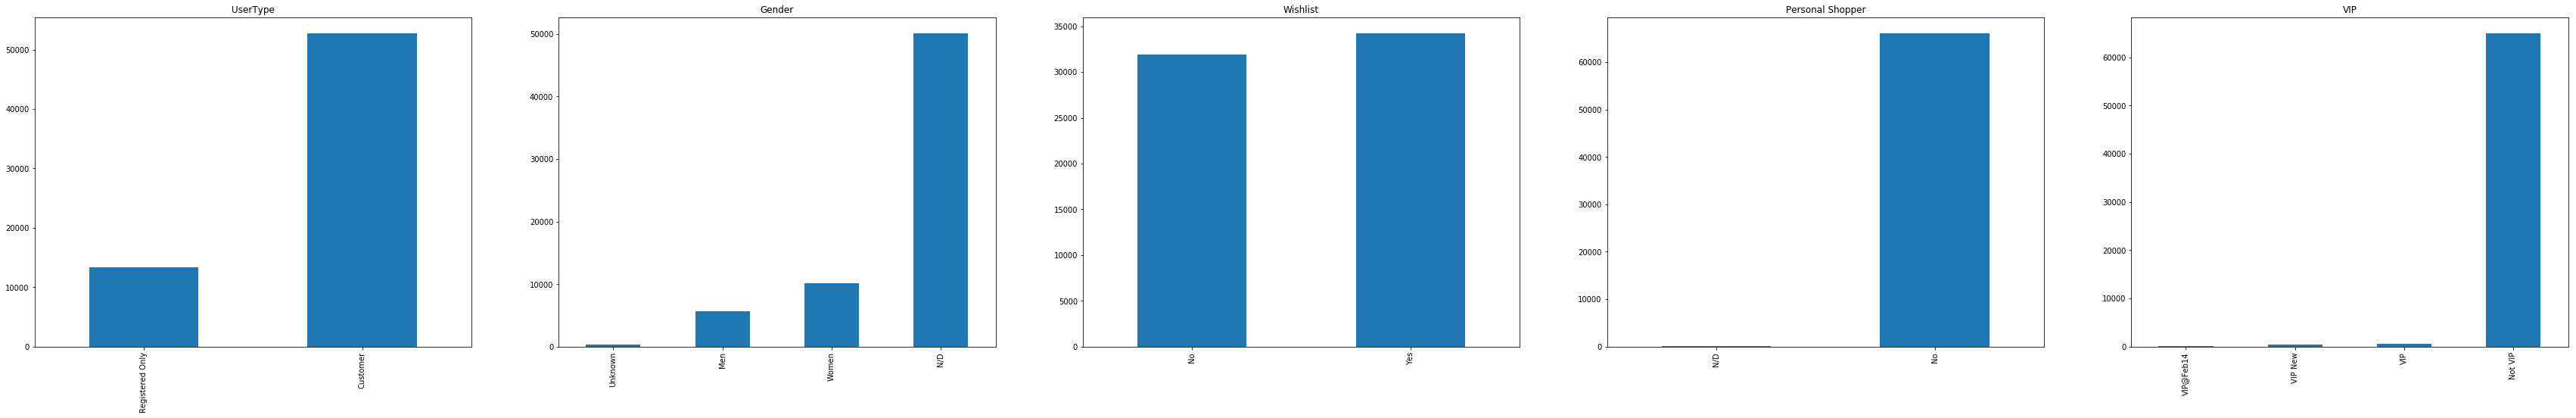

In [0]:
fig, ax = plt.subplots(nrows=1, ncols=5, sharey=False, figsize=(60,8))

ax[0].set_title("UserType")
ax[1].set_title("Gender")
ax[2].set_title("Wishlist")
ax[3].set_title("Personal Shopper")
ax[4].set_title("VIP")

count = users.UserType.value_counts()
count.sort_values().plot(kind='bar',  legend=False, ax=ax[0])

count = users.Gender.value_counts()
count.nlargest(30).sort_values().plot(kind='bar',  legend=False, ax=ax[1])

count = users.HasUsedWishlist.value_counts()
count.nlargest(30).sort_values().plot(kind='bar',  legend=False, ax=ax[2])

count = users.IsPersonalShopper.value_counts()
count.sort_values().plot(kind='bar',  legend=False, ax=ax[3])

count = users.IsVIP.value_counts()
count.sort_values().plot(kind='bar',  legend=False, ax=ax[4])

<h3> Online Behavior - Cookies </h3>

In [0]:
clickstream.head(3)

,PageViewDate,sessionid,SessionIdFinal,CookieID,PageType,PageSubType,PageURL,Referral,ProductID,UserID,UserIDIdentified,GeoSubfolder,orderportalid
0,2015-01-14 09:25:31.947,wk3qgqkpfy1qel0tbcats5jm,wk3qgqkpfy1qel0tbcats5jm-D20150114-N7277,iwo0v34xejz3tooxqleberel578CEF4562824948040D78...,Product Page,Product Page,http://www.farfetch.com/shopping/women/lanvin-...,http://www.farfetch.com/shopping/women/sale/cl...,10746328,NaN,0xEB088890C11305AEE5A0A37C52B9BA72,United States,NaN
1,2015-01-17 03:52:08.497,w50e1wkg0wuimfenyhun0qgw,w50e1wkg0wuimfenyhun0qgw-D20150117-N27106,wnjklehkxfe4mlhb3bktal52B6E6A8F0D4C02EDD9193E8...,Product Page,Product Page,http://www.farfetch.com/shopping/women/31-phil...,http://www.farfetch.com/shopping/women/search/...,10727895,NaN,0x4B6768C3E224027796A5D371B5C1F768,United States,NaN
2,2015-01-16 19:24:42.147,jaotvjamk25jd0mhipkfgt2p,jaotvjamk25jd0mhipkfgt2p-D20150116-N27816,bl0o3jldripyitenac3uf4lp2C9533ED0C61696B551139...,Product Page,Product Page,http://www.farfetch.com/shopping/men/dsquared2...,http://www.farfetch.com/shopping/men/dsquared2...,10734558,NaN,0x8A31556FC4BB8DE629E7DCD6000D63F4,United States,NaN


In [0]:
clickstream.isnull().sum().sort_values(ascending=False) / clickstream.shape[0] * 100

orderportalid       99.7793
UserID              87.7539
UserIDIdentified    48.4576
Referral             0.2451
PageURL              0.2451
GeoSubfolder         0.0002
ProductID            0.0000
PageSubType          0.0000
PageType             0.0000
CookieID             0.0000
SessionIdFinal       0.0000
sessionid            0.0000
PageViewDate         0.0000
dtype: float64

In [0]:
clickstream.PageType.unique()

array(['Product Page', 'Listing Page', 'User Account', 'Checkout Page',
       'Others', 'Boutiques', 'People', 'Home Page', 'Designers'],
      dtype=object)

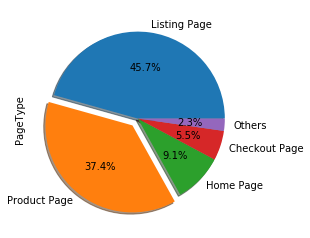

In [0]:
explode = (0, 0.1, 0, 0, 0)
(clickstream.PageType.value_counts() / clickstream.shape[0] * 100).nlargest(5).plot(kind='pie',shadow=True, explode=explode, autopct='%1.1f%%')

In [0]:
prod_stream = clickstream[clickstream.PageType=="Product Page"]

In [0]:
print("Product most consult has been seen {} times" .format(prod_stream.ProductID.value_counts().max()))
print("Product less consult has been seen {} time" .format(prod_stream.ProductID.value_counts().min()))
print("Product average consulted has been seen {} times" .format(prod_stream.ProductID.value_counts().mean()))
print("Product median consulted has been seen {} times" .format(prod_stream.ProductID.value_counts().median()))

Product most consult has been seen 618 times
Product less consult has been seen 1 time
Product average consulted has been seen 4.511043991798347 times
Product median consulted has been seen 2.0 times


In [0]:
print("Number of customer who consulted products : {} " .format(len(prod_stream.UserIDIdentified.unique())))

Number of customer who consulted products : 47072 


In [0]:
print("Customer with the most visit has {} visits on products" .format(prod_stream.UserIDIdentified.value_counts().max()))
print("Customer with the most visit has {} visits on products" .format(prod_stream.UserIDIdentified.value_counts().min()))
print("Customer average visits: {}" .format(prod_stream.UserIDIdentified.value_counts().mean()))
print("Customer median visits: {}" .format(prod_stream.UserIDIdentified.value_counts().median()))

Customer with the most vist has 290 visits on products
Customer with the most vist has 1 visits on products
Customer average visits: 4.145928491002953
Customer median visits: 2.0


<h3> Action online Management </h3>

In [0]:
action = click_user[click_user.PageType=="Product Page"]

In [0]:
action.head(2)

,ActionDate,sessionid,SessionIdFinal,CookieID,PageType,PageSubType,URL,ProductID,trackerId,UserAction,UserID,UserIDIdentified,GeoSubfolder
104,2015-01-18 12:23:50.607,azmpdplgdiyz12noz3qal0zx,azmpdplgdiyz12noz3qal0zx-D20150118-N0,azmpdplgdiyz12noz3qal0zx6A538E2E197020770B8AAF...,Product Page,Product Page,http://www.farfetch.com/shopping/men/rick-owen...,10739967,236,Click on forward arrow,0xCFCD208495D565EF66E7DFF9F98764DA,0xCFCD208495D565EF66E7DFF9F98764DA,United States
105,2015-01-18 12:23:52.967,azmpdplgdiyz12noz3qal0zx,azmpdplgdiyz12noz3qal0zx-D20150118-N0,azmpdplgdiyz12noz3qal0zx6A538E2E197020770B8AAF...,Product Page,Product Page,http://www.farfetch.com/shopping/men/rick-owen...,10739967,236,Click on forward arrow,0xCFCD208495D565EF66E7DFF9F98764DA,0xCFCD208495D565EF66E7DFF9F98764DA,United States


In [0]:
action.UserAction.unique()

array(['Click on forward arrow', 'Click on navigation of thumbnails',
       'N/D', 'Click on picture',
       'Notify me if back in stock, click on Send button',
       'Is your size not available?', 'Expand/Collapse Description',
       'Click on drop down to select size', 'Pause video', 'Add to Bag',
       'Save', 'Expand/Collapse Size and Fit', 'Expand/Collapse Boutique',
       'Click to see Bag details on Header', 'Size guide',
       'Click on back arrow', 'Click on Full Screen',
       'Expand/Collapse Composition Care', 'Play video',
       'Remove from bag', 'Unsave', 'Click on Next to other page',
       'Sort by other', 'Click to see Favorite details on Header',
       'Click on "60"/"180"', 'Click on "Register"', 'End video',
       'Expand/Collapse Shipping & Free Returns',
       'Click to contact CS team',
       'Click to see Sign In/Register details on Header',
       'Close Header tab', 'Resume video', 'Follow Boutique',
       'Click on NickName to see dropdown lis

In [0]:
action_positive = action[action.UserAction.isin(['Notify me if back in stock, click on Send button'
                                                 ,'Save',
                                                'Follow Designer',
                                                'Add to Bag'])]

In [0]:
action_positive.UserAction.value_counts()

Add to Bag                                          27090
Save                                                 8739
Notify me if back in stock, click on Send button     1434
Follow Designer                                        35
Name: UserAction, dtype: int64

In [0]:
negative_action = action[action.UserAction.isin(['Unsave'
                                                 ,'Unfollow Boutique',
                                                'Unfollow Designer',
                                                'Remove from bag'])]

In [0]:
negative_action.UserAction.value_counts()

Unsave               1557
Remove from bag      1116
Unfollow Boutique      11
Unfollow Designer       3
Name: UserAction, dtype: int64

<h2> Creation of a Brand Table </h2> 

In [0]:
brand_table = pd.DataFrame(data=products.Brand.unique(), columns=['Brands'])

In [0]:
brand_table["Number of products"] = brand_table.Brands.map(products.Brand.value_counts())

In [0]:
test = products[["Brand","MainColour"]].astype(str)
brand_table["Colour"] = brand_table.Brands.map(test.groupby(['Brand'])['MainColour'].apply(lambda x: ','.join(list(set(x)))))

In [0]:
test = products[["Brand","Family"]].astype(str)
brand_table["Family"] = brand_table.Brands.map(test.groupby(['Brand'])['Family'].apply(lambda x: ','.join(list(set(x)))))

In [0]:
test = products[["Brand","SeasonOriginal"]].astype(str)
brand_table["Season"] = brand_table.Brands.map(test.groupby(['Brand'])['SeasonOriginal'].apply(lambda x: ','.join(list(set(x)))))

In [0]:
test = products[["Brand","Department"]].astype(str)
brand_table["Department"] = brand_table.Brands.map(test.groupby(['Brand'])['Department'].apply(lambda x: ','.join(list(set(x)))))

In [0]:
test = products[["Brand","Gender"]].astype(str)
brand_table["Gender"] = brand_table.Brands.map(test.groupby(['Brand'])['Gender'].apply(lambda x: ','.join(list(set(x)))))

In [0]:
test = products[["Brand","Category"]].astype(str)
brand_table["Category"] = brand_table.Brands.map(test.groupby(['Brand'])['Category'].apply(lambda x: ','.join(list(set(x)))))

In [0]:
join = order.join(products[["Brand","ProductID"]].set_index('ProductID'),how="left",on="ProductId")

In [0]:
join.groupby(['Brand'])['Quantity'].sum()
brand_table["Quantity Ordered"] = brand_table.Brands.map(join.groupby(['Brand'])['Quantity'].sum())
brand_table["Quantity Ordered"] = brand_table["Quantity Ordered"].fillna(0)

In [0]:
brand_table.head()

,Brands,Number of products,Colour,Family,Season,Department,Gender,Category,Quantity Ordered
0,ÁGUA DE COCO,15,"BLUE,YELLOW & ORANGE,GREEN,RED","Bags,Clothing",SS14,Lab,WOMEN,"Skirts,Tops,Shoulder Bags,Shorts,Beachwear,Dre...",1.0
1,MARIES ROBE DE NUIT,20,"GREEN,N/D,YELLOW & ORANGE,BLACK,BLUE,GREY,WHITE",Clothing,"AW14,AW13,SS14",Lab,WOMEN,"Tops,Lingerie & Hosiery,Dresses",0.0
2,LANVIN,2925,"WHITE,GREEN,METALLIC,PINK & PURPLE,N/D,YELLOW ...","Vintage & Archive,Lifestyle,Bags,Accessories,C...","SS13,AW12,AW13,VINTAGE,AW10,ARCHIVE,AW14,AW11,...",Luxe,"WOMEN,MEN,UNISEX","Deck Shoes,Make Up Bag,Lingerie & Hosiery,Cuff...",154.0
3,WOOLRICH,242,"WHITE,GREEN,PINK & PURPLE,YELLOW & ORANGE,MULT...","Bags,Lifestyle,Clothing,Accessories","SS13,AW13,AW14,AW11,CARRYOVER,SS11,SS12,SS15,S...",Lab,"UNISEX,MEN,WOMEN","Totes,Skirts,Jackets,Tops,Trousers,Luggage & H...",3.0
4,MELINDA GLOSS,56,"WHITE,GREEN,MULTICOLOUR,BLACK,BLUE,GREY,BROWN,...","Shoes,Clothing,Accessories","SS13,AW13,AW11,SS11,SS12,SS15,SS14,AW12",Lab,"MEN,UNISEX","Trainers,Jackets,Tops,Trousers,Gloves,Scarves,...",2.0


In [0]:
import pickle

pickle.dump(brand_table, open('/content/gdrive/My Drive/Interview/Reco/Brand_table.pkl','wb'))

In [0]:
import pickle

brand_table = pickle.load(open('/content/gdrive/My Drive/Interview/Reco/Brand_table.pkl','rb'))

<h2> Creation of a User Table </h2>

In [0]:
user_table = users[["UserID","HasUsedWishlist"]]

In [0]:
user_table["Nb_orders"] = user_table.UserID.map(order.UserID.value_counts())
user_table["Nb_orders"] = user_table["Nb_orders"].fillna(0)

In [0]:
join = order.join(products[["Brand","ProductID"]].set_index('ProductID'),how="left",on="ProductId")
join["Brand"] = join["Brand"].astype(str)

In [0]:
user_table["Brand_Ordered"] = user_table.UserID.map(join.groupby(['UserID'])['Brand'].apply(lambda x: ','.join(list(set(x)))))
user_table["Brand_Ordered"] = user_table["Brand_Ordered"].fillna("")

In [0]:
join = prod_stream.join(products[["Brand","ProductID"]].set_index('ProductID'),how="left",on="ProductID")
join["Brand"] = join["Brand"].astype(str)

In [0]:
user_table["Brand_Visited"] = user_table.UserID.map(join.groupby(['UserIDIdentified'])['Brand'].apply(lambda x: ','.join(list(set(x)))))
user_table["Brand_Visited"] = user_table["Brand_Visited"].fillna("")

In [0]:
join = action_positive[action_positive.UserAction=="Add to Bag"].join(products[["Brand","ProductID"]].set_index('ProductID'),how="left",on="ProductID")
join["Brand"] = join["Brand"].astype(str)

In [0]:
user_table["Brand_Bag"] = user_table.UserID.map(join.groupby(['UserIDIdentified'])['Brand'].apply(lambda x: ','.join(list(set(x)))))
user_table["Brand_Bag"] = user_table["Brand_Bag"].fillna("")

In [0]:
join = action_positive[action_positive.UserAction=="Save"].join(products[["Brand","ProductID"]].set_index('ProductID'),how="left",on="ProductID")
join["Brand"] = join["Brand"].astype(str)

In [0]:
user_table["Brand_Saved"] = user_table.UserID.map(join.groupby(['UserIDIdentified'])['Brand'].apply(lambda x: ','.join(list(set(x)))))
user_table["Brand_Saved"] = user_table["Brand_Saved"].fillna("")

In [0]:
join = negative_action[negative_action.UserAction=="Unsave"].join(products[["Brand","ProductID"]].set_index('ProductID'),how="left",on="ProductID")
join["Brand"] = join["Brand"].astype(str)

In [0]:
user_table["Unsave"] = user_table.UserID.map(join.groupby(['UserIDIdentified'])['Brand'].apply(lambda x: ','.join(list(set(x)))))
user_table["Unsave"] = user_table["Unsave"].fillna("")

In [0]:
join = negative_action[negative_action.UserAction=="Remove from bag"].join(products[["Brand","ProductID"]].set_index('ProductID'),how="left",on="ProductID")
join["Brand"] = join["Brand"].astype(str)

In [0]:
user_table["Dropped"] = user_table.UserID.map(join.groupby(['UserIDIdentified'])['Brand'].apply(lambda x: ','.join(list(set(x)))))
user_table["Dropped"] = user_table["Dropped"].fillna("")

In [0]:
user_table["Interest_Brand"] = user_table["Brand_Ordered"] .map(str) + ',' + user_table["Brand_Visited"].map(str) + ',' + user_table["Brand_Bag"].map(str) + ',' + user_table["Brand_Saved"].map(str)
        
#user_table["Interest_Brand"] = user_table["Interest_Brand"].apply(lambda x: ','.join(pd.unique(x.split())))

In [0]:
def dedup(value):
    words = set(value.split(','))
    return ','.join(words)

In [0]:
user_table["Interest_Brand"] = user_table.Interest_Brand.apply(dedup)

In [0]:
user_table["Low_interest"] = user_table["Unsave"] .map(str) + ',' + user_table["Dropped"].map(str)
        
#user_table["Low_interest"] = user_table["Low_interest"].apply(lambda x: ','.join(pd.unique(x.split())))

user_table["Low_interest"] = user_table.Low_interest.apply(dedup)

In [0]:
final_user_table = user_table[["UserID","HasUsedWishlist","Interest_Brand","Low_interest"]]

In [0]:
import pickle

pickle.dump(final_user_table, open('/content/gdrive/My Drive/Interview/Reco/user_table.pkl','wb'))

In [0]:
import pickle

user_table = pickle.load(open('/content/gdrive/My Drive/Interview/Reco/user_table.pkl','rb'))

In [0]:
final_user_table.head()

,UserID,HasUsedWishlist,Interest_Brand,Low_interest
0,0x0D3056570A0D90872B31C6F414DF021D,Yes,",SAM EDELMAN,TOD'S,DOLCE & GABBANA,JIMMY CHOO,...",
1,0x96D2E60551F80B7AE46EE722C30221B0,No,",GIVENCHY",
2,0x69093F1011A2BD322D8A87009A8494AC,No,"GIANVITO ROSSI,",
3,0xA841752499FF55CFF73856B1847EE978,Yes,",DOLCE & GABBANA",
4,0x2D3A37B5AFF04368D1ABD1F3E8465426,No,",BALENCIAGA,GOLDEN GOOSE DELUXE BRAND",


<h2> Preprocessing before model </h2>

In [0]:
brand_table=brand_table.dropna()

In [0]:
brand_table.shape

(4705, 9)

In [0]:
brand_table.head(5)

,Brands,Number of products,Colour,Family,Season,Department,Gender,Category,Quantity Ordered
0,ÁGUA DE COCO,15,"BLUE,YELLOW & ORANGE,GREEN,RED","Bags,Clothing",SS14,Lab,WOMEN,"Skirts,Tops,Shoulder Bags,Shorts,Beachwear,Dre...",1.0
1,MARIES ROBE DE NUIT,20,"GREEN,N/D,YELLOW & ORANGE,BLACK,BLUE,GREY,WHITE",Clothing,"AW14,AW13,SS14",Lab,WOMEN,"Tops,Lingerie & Hosiery,Dresses",0.0
2,LANVIN,2925,"WHITE,GREEN,METALLIC,PINK & PURPLE,N/D,YELLOW ...","Vintage & Archive,Lifestyle,Bags,Accessories,C...","SS13,AW12,AW13,VINTAGE,AW10,ARCHIVE,AW14,AW11,...",Luxe,"WOMEN,MEN,UNISEX","Deck Shoes,Make Up Bag,Lingerie & Hosiery,Cuff...",154.0
3,WOOLRICH,242,"WHITE,GREEN,PINK & PURPLE,YELLOW & ORANGE,MULT...","Bags,Lifestyle,Clothing,Accessories","SS13,AW13,AW14,AW11,CARRYOVER,SS11,SS12,SS15,S...",Lab,"UNISEX,MEN,WOMEN","Totes,Skirts,Jackets,Tops,Trousers,Luggage & H...",3.0
4,MELINDA GLOSS,56,"WHITE,GREEN,MULTICOLOUR,BLACK,BLUE,GREY,BROWN,...","Shoes,Clothing,Accessories","SS13,AW13,AW11,SS11,SS12,SS15,SS14,AW12",Lab,"MEN,UNISEX","Trainers,Jackets,Tops,Trousers,Gloves,Scarves,...",2.0


<h3> Scaling and hot encoding </h3>

In [0]:
num_column = ["Number of products","Quantity Ordered"]

In [0]:
colour_d = brand_table['Colour'].str.get_dummies(sep=',')
family_d = brand_table['Family'].str.get_dummies(sep=',')
season_d = brand_table['Season'].str.get_dummies(sep=',')
depar_d = brand_table['Department'].str.get_dummies(sep=',')
gender_d = brand_table['Gender'].str.get_dummies(sep=',')
categ_d = brand_table['Category'].str.get_dummies(sep=',')

In [0]:
categDF_encoded = np.hstack((colour_d.values,family_d.values,season_d.values,depar_d.values,gender_d.values,categ_d.values))

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_column = scaler.fit_transform(brand_table[num_column].values)

In [0]:
X = np.hstack((num_column,categDF_encoded))

<h3> Dimensional reduction </h3>

In [0]:
from sklearn.decomposition import PCA

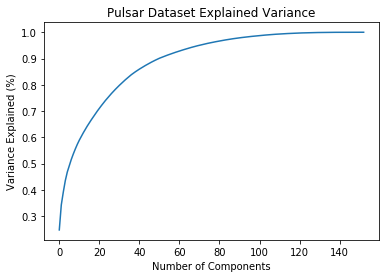

In [0]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [0]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=60)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print (pca.explained_variance_ratio_.sum())

0.9257596495467124


In [0]:
X_projected = pca.transform(X)

<h3> Brand modelisation </h3>

In [0]:
from sklearn.neighbors import NearestNeighbors

In [0]:
knn = NearestNeighbors(n_neighbors=6,p=2,metric='euclidean')
knn.fit(X_projected)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                 radius=1.0)

In [0]:
Liste_voisins = knn.kneighbors(X_projected, return_distance=False)

In [0]:
def get_reco(id):
    Liste_brand=[]
    for i in range(1,6):        
        Liste_brand.append(Liste_voisins[id,i])
    return Liste_brand 

In [0]:
def Affichage(id):
    print ('Recommandation for the Brand {} with KNN: '.format(brand_table["Brands"].iloc[[id]].item()) )
    Liste_f = get_reco(id)
    counter = 0
    
    for i in range(0,5):
                    
        print('Brand {} Recommended: {}'.format(counter+1,brand_table["Brands"].iloc[[Liste_f[i]]].item()) )
        counter+=1
        
        if counter == 5:
            break

In [0]:
Affichage(18)

Recommandation for the Brand CHRISTIAN LOUBOUTIN with KNN: 
Brand 1 Recommended: DIEGO DOLCINI
Brand 2 Recommended: MASQUÉ
Brand 3 Recommended: CZO
Brand 4 Recommended: ALEXA WAGNER
Brand 5 Recommended: MANOLO BLAHNIK


<h2> User Recommendation -- Brand recommendation on Behavior </h2>

In [0]:
user_table.Interest_Brand = user_table.Interest_Brand.str.lstrip(',')
user_table.Interest_Brand = user_table.Interest_Brand.str.rstrip(',')
user_table.Low_interest = user_table.Low_interest.str.lstrip(',')
user_table.Low_interest = user_table.Low_interest.str.rstrip(',')

In [0]:
def get_brand(id):
            
    return list(user_table[user_table.UserID==user_table["UserID"].iloc[[id]].item()].Interest_Brand)[0].split(",")

In [0]:
def get_low_int(id):
    
    return list(user_table[user_table.UserID==user_table["UserID"].iloc[[id]].item()].Low_interest)[0].split(",")

In [0]:
def get_id(name):
    return brand_table.index[brand_table['Brands']==name].item()

In [0]:
import random

def user_reco(id):
    
    list_brand = get_brand(id)
    list_low = get_low_int(id)
    full_list = []
    Liste_reco = []
    
    for i in range(len(list_brand)):
        
        Liste_f = get_reco(get_id(list_brand[i]))
        
        for j in range(0,5):
            
            full_list.append(brand_table["Brands"].iloc[[Liste_f[j]]].item())
    
    full_list = list(set(full_list))
    
    if len(full_list)==5:
        Liste_reco = full_list
    
    else:
        random.shuffle(full_list)
        counter = 0
        
        for i in range(len(full_list)):
            
            if full_list[i] not in list_brand and full_list[i] not in list_low:
                
                Liste_reco.append(full_list[i])
                counter+=1
            
            if counter == 5:
                break
    
            
    return Liste_reco

In [0]:
def display_user(id):
    
    list_reco = user_reco(id)
    
    print ('Recommandation for the user {} with KNN: '.format(user_table["UserID"].iloc[[id]].item()) )
    
    for i in range(len(list_reco)):
        
        print('Brand {} Recommended: {}'.format(i+1,list_reco[i]) )
        
        

In [0]:
display_user(1)

Recommandation for the user 0x96D2E60551F80B7AE46EE722C30221B0 with KNN: 
Brand 1 Recommended: VALENTINO GARAVANI
Brand 2 Recommended: DSQUARED2
Brand 3 Recommended: SAINT LAURENT
Brand 4 Recommended: DIESEL
Brand 5 Recommended: Giuseppe Zanotti Design


<h2> Recommendation with double input (Brand + User) </h2>

In [0]:
def double_display(brand_id, user_id):
    
    Affichage(brand_id)
    print("")
    display_user(user_id)
    

In [0]:
double_display(18,3)

Recommandation for the Brand CHRISTIAN LOUBOUTIN with KNN: 
Brand 1 Recommended: DIEGO DOLCINI
Brand 2 Recommended: MASQUÉ
Brand 3 Recommended: CZO
Brand 4 Recommended: ALEXA WAGNER
Brand 5 Recommended: MANOLO BLAHNIK

Recommandation for the user 0xA841752499FF55CFF73856B1847EE978 with KNN: 
Brand 1 Recommended: GIVENCHY
Brand 2 Recommended: ALEXANDER MCQUEEN
Brand 3 Recommended: DSQUARED2
Brand 4 Recommended: LANVIN
Brand 5 Recommended: SAINT LAURENT


<h2> User Recommendation -- Collaborative Filtering -> Not efficient on this dataset </h2>

<h3> Preprocessing </h3>

In [0]:
user_table.head(3)

,UserID,HasUsedWishlist,Interest_Brand,Low_interest
0,0x0D3056570A0D90872B31C6F414DF021D,Yes,"SAM EDELMAN,TOD'S,DOLCE & GABBANA,JIMMY CHOO,J...",
1,0x96D2E60551F80B7AE46EE722C30221B0,No,GIVENCHY,
2,0x69093F1011A2BD322D8A87009A8494AC,No,GIANVITO ROSSI,


In [0]:
user_table.Interest_Brand = user_table.Interest_Brand.str.lstrip(',')
user_table.Interest_Brand = user_table.Interest_Brand.str.rstrip(',')

In [0]:
user_table.Low_interest = user_table.Low_interest.str.lstrip(',')
user_table.Low_interest = user_table.Low_interest.str.rstrip(',')

In [0]:
dummy_interest = user_table['Interest_Brand'].str.get_dummies(sep=',')

In [0]:
import pickle

pickle.dump(dummy_interest, open('/content/gdrive/My Drive/Interview/Reco/dummy_interest.pkl','wb'))

In [0]:
dummy_low = user_table['Low_interest'].str.get_dummies(sep=',')

In [0]:
dummy_wish = user_table['HasUsedWishlist'].str.get_dummies(sep=',')

In [0]:
X = np.hstack((dummy_interest.values,dummy_low.values,dummy_wish.values))

<h3> Dimension Reduction </h3>

In [0]:
from sklearn.decomposition import PCA

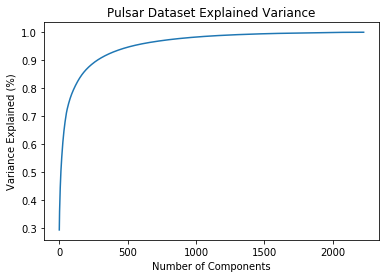

In [0]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [0]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=400)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=400, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print (pca.explained_variance_ratio_.sum())

0.9292999704111696


In [0]:
X_projected = pca.transform(X)

<h3> Modeling to find closest users profile </h3>

In [0]:
from sklearn.neighbors import NearestNeighbors

In [0]:
knn = NearestNeighbors(n_neighbors=6,p=2,metric='euclidean')
knn.fit(X_projected)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                 radius=1.0)

In [0]:
Liste_voisins = knn.kneighbors(X_projected, return_distance=False)

In [0]:
import pickle

pickle.dump(Liste_voisins, open('/content/gdrive/My Drive/Interview/Reco/voisin_users.pkl','wb'))

In [0]:
def get_reco(id):
    Liste_brand=[]
    for i in range(1,6):        
        Liste_brand.append(Liste_voisins[id,i])
    return Liste_brand 

In [0]:
def Get_User(id):
    
    Liste_f = get_reco(id)
    Liste_users = []
    counter = 0
    
    for i in range(0,5):
                    
        Liste_users.append(user_table["UserID"].iloc[[Liste_f[i]]].item())
        counter+=1
        
        if counter == 5:
            break
            
    return Liste_users

In [0]:
def flatten(liste):
    
    new_list = []
    
    for i in range(len(liste)):
        
        split = liste[i].split(",")
        for j in range(len(split)):
            
            if split[j] not in new_list:
                
                new_list.append(split[j])
                
    return new_list

In [0]:
def colab_reco(id):
    
    Liste_users = Get_User(id)
    
    Liste_brands = list(user_table[user_table.UserID.isin(Liste_users)].Interest_Brand)
    
    Liste_brands = flatten(Liste_brands)
    
    Liste_reco = []
    
    for i in range(len(Liste_brands)):
        
        if Liste_brands[i] not in list(user_table[user_table.UserID==user_table["UserID"].iloc[[id]].item()].Interest_Brand)[0].split(",") and Liste_brands[i] not in list(user_table[user_table.UserID==user_table["UserID"].iloc[[id]].item()].Low_interest)[0].split(","):
            
            Liste_reco.append(Liste_brands[i])
            
            if len(Liste_reco)==5:
                return Liste_reco
        
    if len(Liste_reco)==0:
            
        Liste_reco = list(user_table[user_table.UserID==user_table["UserID"].iloc[[id]].item()].Interest_Brand)[0].split(",")
            
    return Liste_reco
                 
    
    
    

In [0]:
colab_reco(1)

['PEIR WU', 'COMME DES GARÇONS HOMME VINTAGE', 'DELVAUX VINTAGE', 'EGREY']

In [0]:
Get_User(1)

['0x38B1E7A4571CD68743DF7FE8F07804DB',
 '0x517AC112D15F21BFF53B257372049688',
 '0x9F5E07B1CCCD14F428CCF1CE7E24A161',
 '0x1564FFC75E8E3DF36A7EE8B96FC1C358',
 '0x3020150997E00B7D6D8820AD7DE20526']

In [0]:
user_table[user_table.UserID.isin(Get_User(320))].Interest_Brand

5528                             PEIR WU
20587    COMME DES GARÇONS HOMME VINTAGE
20789                                   
39197                    DELVAUX VINTAGE
43540                              EGREY
Name: Interest_Brand, dtype: object

In [0]:
user_table[user_table.UserID==user_table["UserID"].iloc[[0]].item()].Interest_Brand

0    SAM EDELMAN,TOD'S,DOLCE & GABBANA,JIMMY CHOO,J...
Name: Interest_Brand, dtype: object